## Introduction

In this report I will aim to discover some hidden insights in data provided by Walmart. Some potential questions retail stores might ask about are highest performing stores and months. Busiest periods for sales in store. As well as how temperature has affected purchasing decisions. This dataset also has a fuel price and CPI (Customer price index). Although no obvious observations can be made using these two currently, I aim to use these two columns to hopefully provide some meaninful data to the proposed stakeholder.

## Table of contents

## Glossary

<p><span style="font-weight: bold">Store: </span>..</p>
<p><span style="font-weight: bold">Date: </span>..</p>
<p><span style="font-weight: bold">Weekly_Sales: </span>..</p>
<p><span style="font-weight: bold">Holiday_Flag: </span>..</p>
<p><span style="font-weight: bold">Temperature: </span>..</p>
<p><span style="font-weight: bold">Fuel_Price: </span>..</p>
<p><span style="font-weight: bold">CPI: </span>..</p>
<p><span style="font-weight: bold">Unemployment: </span>..</p>

In [1]:
import pandas as pd
import os
import datetime

Importing required libraries needed for the immediate analysis

In [2]:
all_data = pd.read_csv("archive/Walmart.csv")
all_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Adding a month column so we can find out the busiest month, it will likely be December given the state of holidays in America. However, we can dig deeper after we find do some initial digging.

In [3]:
all_data['Date'] = pd.to_datetime(all_data['Date'], dayfirst=True)
all_data['Month'] = all_data['Date'].dt.month
all_data['Week'] = all_data['Date'].dt.isocalendar().week

# all_data = all_data.drop(columns='Hour')

In [4]:
all_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,9


In [5]:
import matplotlib.pyplot as plt

Importing matplotlib since we will need it soon. Lets groupby sales first and find out some more information from the data.

## Question 1: Which store had had the highest sales?

Using the store number and the sum of the weekly sales we can determine the month with the highest weekly sales. 

In [6]:
temp = all_data.groupby('Store')['Weekly_Sales'].sum('Numeric')
temp.head()

Store
1    2.224028e+08
2    2.753824e+08
3    5.758674e+07
4    2.995440e+08
5    4.547569e+07
Name: Weekly_Sales, dtype: float64

In [7]:
temp = all_data.groupby('Month').sum('Numeric')
temp.head(12)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week
Month,,,,,,,,
1,8280,3.325984e+08,0,13537.81,1166.815,61750.705353,2843.916,900
2,12420,5.687279e+08,135,21006.49,1691.791,92167.711723,4395.392,3510
3,13455,5.927859e+08,0,29145.86,1994.057,100292.699633,4733.267,6255
4,14490,6.468598e+08,0,36297.17,2209.080,107792.224977,5081.281,9540
5,12420,5.571256e+08,0,35349.25,1931.677,92634.154613,4332.128,10530
6,13455,6.226299e+08,0,43996.74,2001.901,100572.514257,4666.007,13860
7,14490,6.500010e+08,0,50238.74,2085.136,108024.280874,5021.085,17730
8,13455,6.130902e+08,0,46375.18,1996.366,100768.602226,4603.092,19125
9,13455,5.787612e+08,135,42363.41,2008.122,100756.446368,4641.799,21645


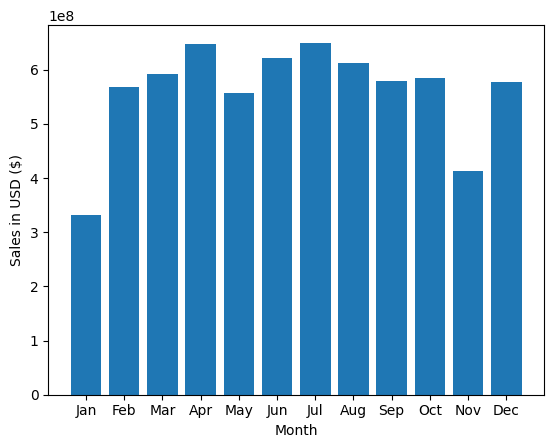

In [8]:
month_num = range(1, 13)
months = []
for i in month_num:
    i = str(i)
    datetime_object = datetime.datetime.strptime(i, "%m")
    month_name = datetime_object.strftime('%b')
    months.append(month_name)
    
plt.bar(months, temp['Weekly_Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()

We now know that April had the highest sales for the year. Lets try to find out if there is a particular reason why this might happen. We have access to holiday data for this data set so perhaps this will give us more information. I think it might also be useful to find out if this was consistent accross all stores or if only one particular store was responsible for the vast majority fo sales in this period. 

Lets take a look at sales by store first, then dig deeper into other reasons as to why April might be the best performing month.

## Question 2: Which store performs the best throughout the year?

In [28]:
store1 = all_data[all_data['Store'] == 1].groupby('Month').sum()
store2 = all_data[all_data['Store'] == 2]
store3 = all_data[all_data['Store'] == 3]
store4 = all_data[all_data['Store'] == 4]
store5 = all_data[all_data['Store'] == 5]

/tmp/ipykernel_26262/3171659339.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  store1 = all_data[all_data['Store'] == 1].groupby('Month').sum()


In [26]:
store1.tail()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Week
Weekly_Sales,,,,,,,,
1899676.88,1,0,70.43,3.891,221.435611,7.143,4,14
1955624.11,1,1,64.52,2.735,211.748433,7.838,11,47
2033320.66,1,1,60.14,3.236,218.467621,7.866,11,47
2270188.99,1,0,47.96,3.112,219.357722,7.866,12,51
2387950.20,1,0,52.33,2.886,211.405122,7.838,12,51
